In [1]:
# Import libraries
import pandas as pd
import pyreadstat as pyr

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# 7th analysis
#load df
df, meta = pyr.read_sav('afrobarometer_nigeria_rd8_2021.sav')
# Select specific columns from the Dataframe based on the information provided in the metadata
# and Replaces the code numbers with the actual values in each column using their actual name in the metadata
columns = ['REGION','Q13', 'Q14']
df_new = df.copy()[columns]
for i in columns:
    x = meta.variable_value_labels[i]
    df_new[i].replace(x, inplace=True)
    


# Rename columns
df_new.columns = ['State', 'Voted in last election', 'Freeness and fairness of last election']

df_new.head()

,State,Voted in last election,Freeness and fairness of last election
0,IMO,I did not vote,"Free and fair, with major problems"
1,FCT ABUJA,I voted in the election,"Free and fair, with major problems"
2,FCT ABUJA,I voted in the election,Completely free and fair
3,FCT ABUJA,I voted in the election,Completely free and fair
4,FCT ABUJA,I did not vote,Not free and fair


In [3]:
df_new['Voted in last election'].value_counts(normalize=True)

I voted in the election             0.779862
I did not vote                      0.204503
I was too young to vote             0.008130
I can’t remember whether I voted    0.006879
Don’t know                          0.000625
Name: Voted in last election, dtype: float64

In [4]:
df_new['Freeness and fairness of last election'].value_counts(normalize=True)

Completely free and fair                  0.397749
Free and fair, but with minor problems    0.281426
Not free and fair                         0.136335
Free and fair, with major problems        0.132583
Don’t know                                0.043152
Do not understand question                0.006254
Refused                                   0.002502
Name: Freeness and fairness of last election, dtype: float64

In [5]:
hope = ["Don’t know","Refused","Do not understand question"]
less = ['Voted in last election', 'Freeness and fairness of last election']

for j in less:
    for i in hope:
        df_new = df_new.loc[df_new[j] != i]

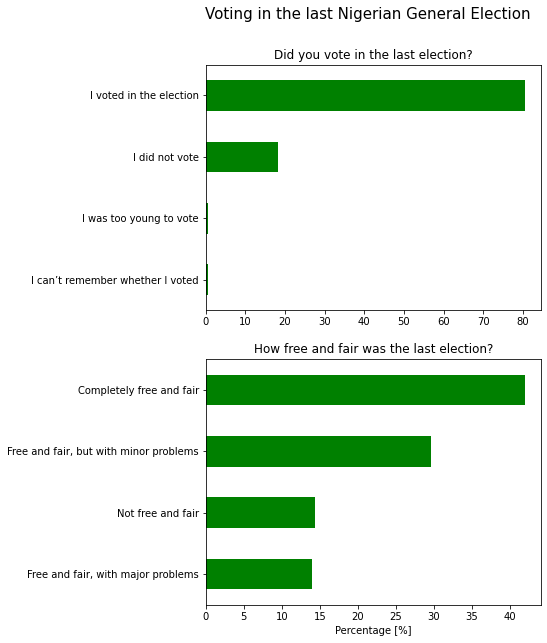

In [6]:
fig = plt.figure()

# Needed to add spacing between 1st and 2nd row
# Add a margin between the main title and sub-plots
fig.subplots_adjust(hspace=0.2, top=2)

# Add the main title
fig.suptitle("Voting in the last Nigerian General Election", y=2.2, fontsize=15)


# Add the subplots
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)



# Plot for axis 1-4
(df_new['Voted in last election'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=ax1, color='green')
(df_new['Freeness and fairness of last election'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=ax2, color='green')

# Add the text for each subplot
ax1.title.set_text("Did you vote in the last election?")
ax2.title.set_text("How free and fair was the last election?")

# label
plt.xlabel('Percentage [%]')

plt.show()

In [14]:
df_new = df_new.loc[df_new['Voted in last election'] != 'I can’t remember whether I voted']

In [34]:
df_piv = (df_new['Voted in last election']
             .groupby(df_new['State'])
             .value_counts(normalize=True)
             .rename('Percentage')
             .to_frame()
             .reset_index()
            )

df_piv

,State,Voted in last election,Percentage
0,ABIA,I voted in the election,0.633333
1,ABIA,I did not vote,0.366667
2,ADAMAWA,I voted in the election,0.857143
3,ADAMAWA,I did not vote,0.142857
4,AKWA IBOM,I voted in the election,0.727273
...,...,...,...
69,TARABA,I did not vote,0.173913
70,YOBE,I voted in the election,0.958333
71,YOBE,I did not vote,0.041667
72,ZAMFARA,I voted in the election,0.866667


In [71]:
# I was trying to get a order index thing such that the chart above would be ordered by the those that refused to vote
show = ((df_new[df_new['Voted in last election'] != 'I voted in the election'])['Voted in last election']).groupby(df_new['State']).value_counts().sort_values(ascending=False)
# Gets the first index of a multilevel index
show.index = show.index.get_level_values(0)

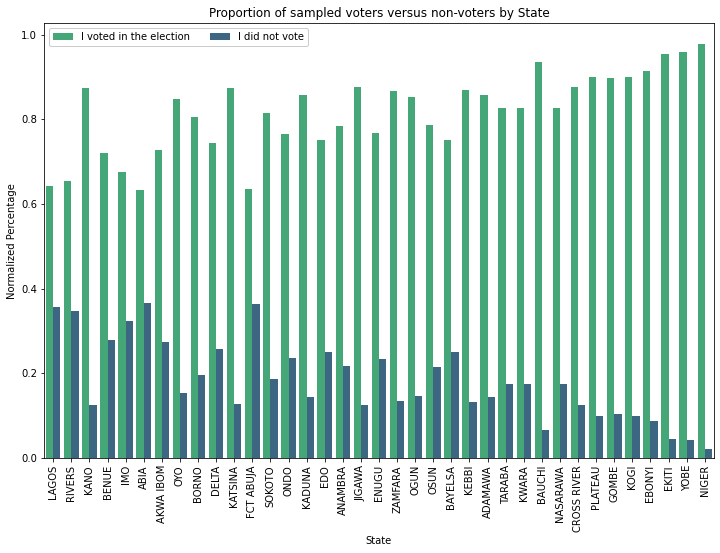

In [73]:
order = show.index
fig = plt.figure(figsize = [12,8])
ax = sns.barplot(data = df_piv, x = 'State', y = 'Percentage', hue = 'Voted in last election',
           palette = 'viridis_r', dodge = 0.4, order=order)
plt.xticks(rotation=90)
plt.ylabel('Normalized Percentage')
plt.title('Proportion of sampled voters versus non-voters by State')
ax.legend(loc=2, ncol=7, framealpha=1);

In [70]:
# I was trying to get a order index thing such that the chart above would be ordered by the those that refused to vote
((df_new[df_new['Voted in last election'] != 'I voted in the election'])['Voted in last election']).groupby(df_new['State']).value_counts(normalize=True).sort_values(ascending=False)

State        Voted in last election
ABIA         I did not vote            1.0
KANO         I did not vote            1.0
KEBBI        I did not vote            1.0
KOGI         I did not vote            1.0
KWARA        I did not vote            1.0
LAGOS        I did not vote            1.0
NASARAWA     I did not vote            1.0
NIGER        I did not vote            1.0
OGUN         I did not vote            1.0
ONDO         I did not vote            1.0
OSUN         I did not vote            1.0
OYO          I did not vote            1.0
PLATEAU      I did not vote            1.0
RIVERS       I did not vote            1.0
SOKOTO       I did not vote            1.0
TARABA       I did not vote            1.0
YOBE         I did not vote            1.0
KATSINA      I did not vote            1.0
KADUNA       I did not vote            1.0
ADAMAWA      I did not vote            1.0
JIGAWA       I did not vote            1.0
AKWA IBOM    I did not vote            1.0
ANAMBRA      I did

In [64]:
show.index = show.index.get_level_values(0)

In [69]:
show.index

Index(['ABIA', 'KANO', 'KEBBI', 'KOGI', 'KWARA', 'LAGOS', 'NASARAWA', 'NIGER',
       'OGUN', 'ONDO', 'OSUN', 'OYO', 'PLATEAU', 'RIVERS', 'SOKOTO', 'TARABA',
       'YOBE', 'KATSINA', 'KADUNA', 'ADAMAWA', 'JIGAWA', 'AKWA IBOM',
       'ANAMBRA', 'BAUCHI', 'BAYELSA', 'BENUE', 'BORNO', 'CROSS RIVER',
       'DELTA', 'EBONYI', 'EDO', 'EKITI', 'ENUGU', 'FCT ABUJA', 'GOMBE', 'IMO',
       'ZAMFARA'],
      dtype='object', name='State')